In [1]:
from ast import literal_eval
from typing import Optional

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from plot_functions import plot_t1_erros_analysis


# Experiment Evaluation for the Ensemble Calibration Test using different Modifications

### 1. evaluate the initial setup for different values of $K$

In [2]:
results_lambda_sampling_h0 = pd.read_csv('final_results_experiments_t1t2_lambda_h0.csv')
results_final = pd.read_csv('final_results_experiments_t1t2_alpha_100_10_10_0.01_lambda.csv')
results_final_3 = pd.read_csv('../../code_mira_von_thomas/final_results_experiments_t1t2_alpha_100_10_3_0.01.csv')
results_mcmc_1 = pd.read_csv('final_results_experiments_t1t2_mcmc_h0_r=100.csv')
results_lambda_1 = pd.read_csv('final_results_experiments_t1t2_lambda_h0_r=100.csv')
results_final_mcmc = pd.read_csv('final_results_experiments_t1t2_alpha_100_10_3_0.01_mcmc.csv')

# results with R = 10
results_test_mcmc_10 = pd.read_csv('results/final_results_experiments_t1t2_alpha_100_10_3_10_0.01_mcmc.csv')
results_test_lambda_10 = pd.read_csv('results/final_results_experiments_t1t2_alpha_100_10_3_10_0.01_lambda.csv')
len(results_test_mcmc_10)

3

### 1. Experiment. $R=10$ number of resamplings 

#### Hit and Run Sampling:

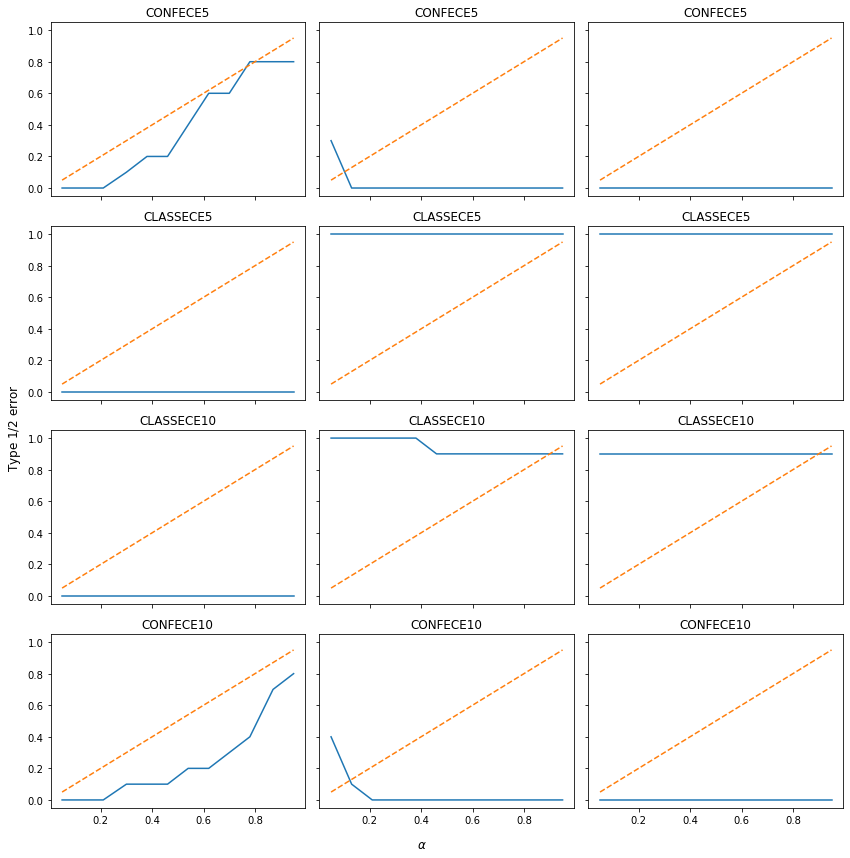

In [3]:
fig_test_t1_mcmc = plot_t1_erros_analysis(results_test_mcmc_10, list_errors=list(results_test_mcmc_10.keys()),sampling_method='hit and run', plot_ha=True, figsize=(12, 12))

#### Initial Lambda Sampling:

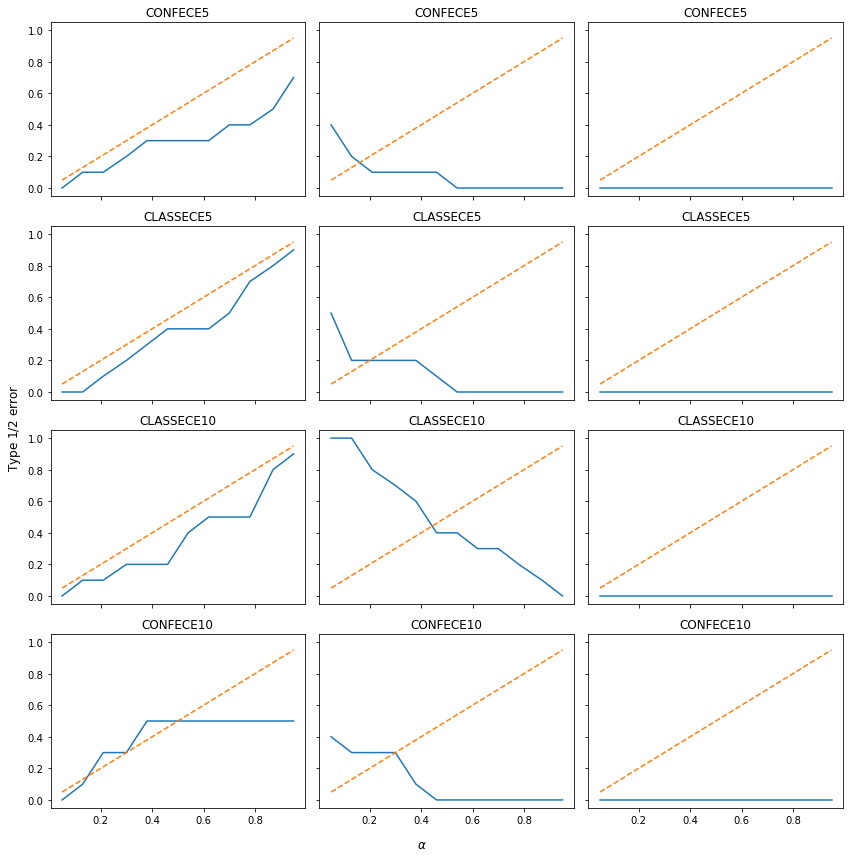

In [4]:
fig_test_lambda = plot_t1_erros_analysis(results_test_lambda_10, list_errors=list(results_test_lambda_10.keys()), plot_ha=True, figsize=(12,12))

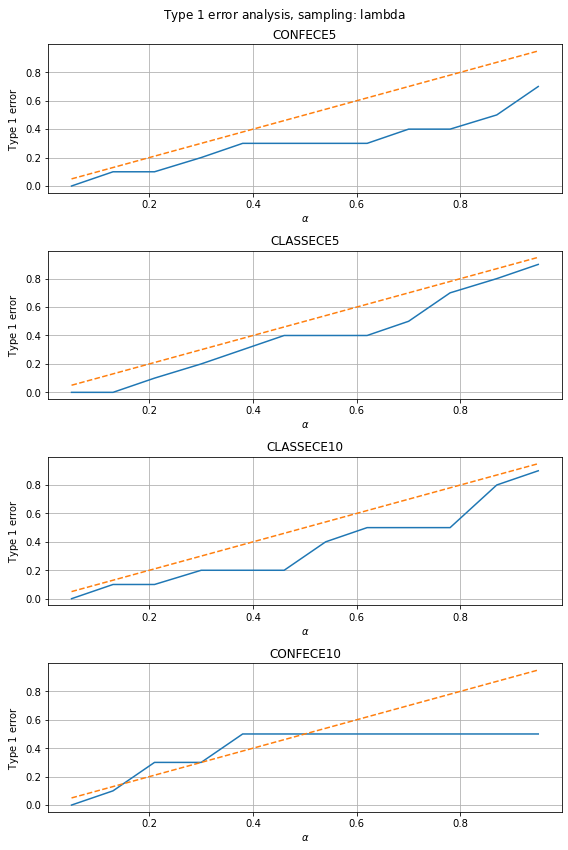

In [7]:
fig_test_lambda_10 = plot_t1_erros_analysis(results_test_lambda_10, list_errors=list(results_test_lambda_10.keys()), take_avg=False)

function for plotting:

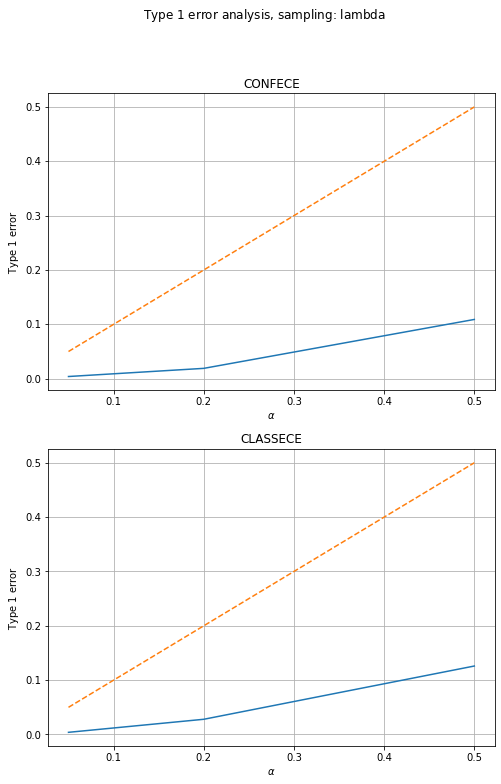

In [4]:
fig_lambdas = plot_t1_erros_analysis(results_lambda_sampling_h0)

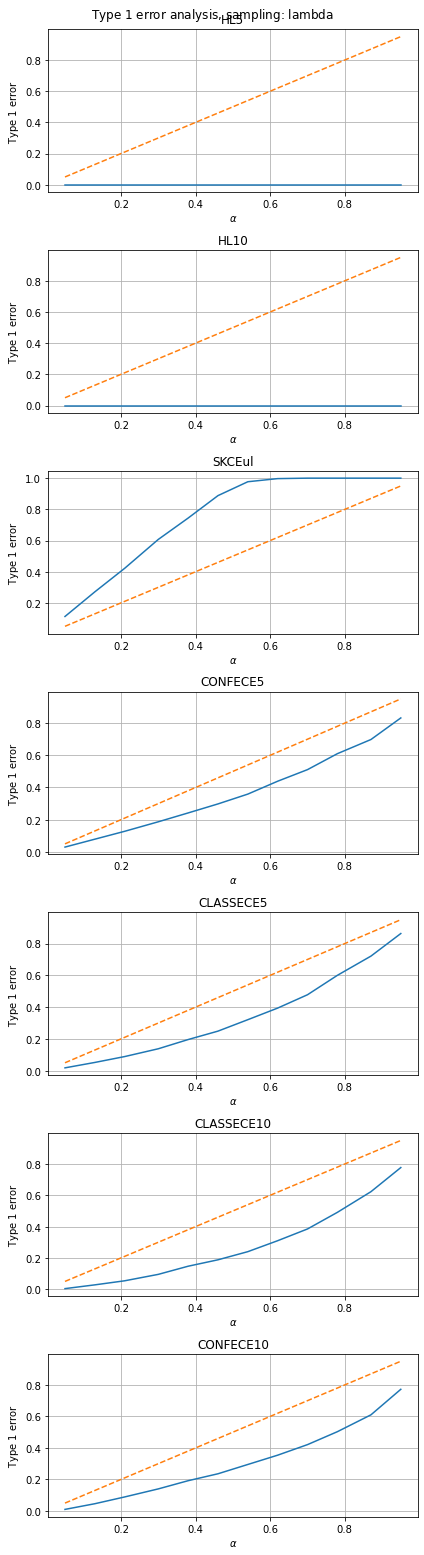

In [3]:
fig_lambdas_final = plot_t1_erros_analysis(results_final, list_errors=list(results_final.keys()), take_avg=False, figsize=(6, 22))

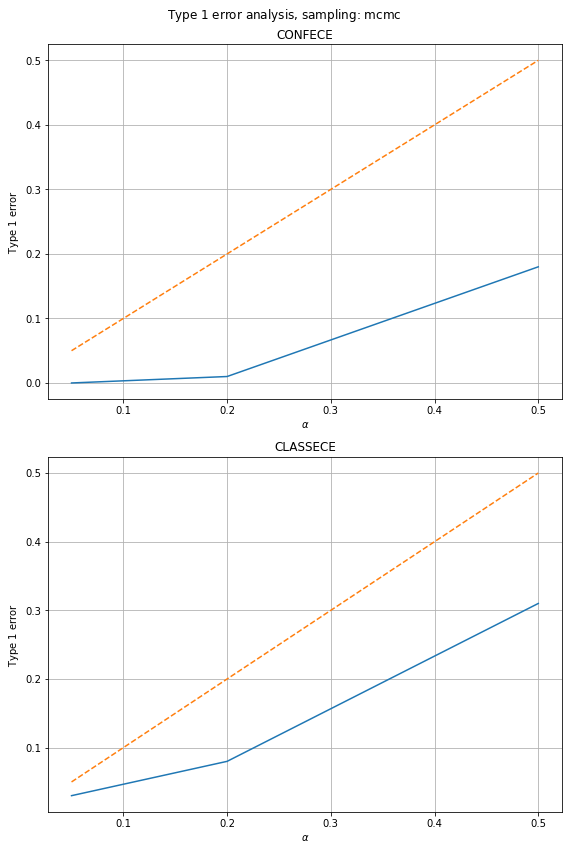

In [7]:
results_mcmc = plot_t1_erros_analysis(results_mcmc_1, sampling_method='mcmc')

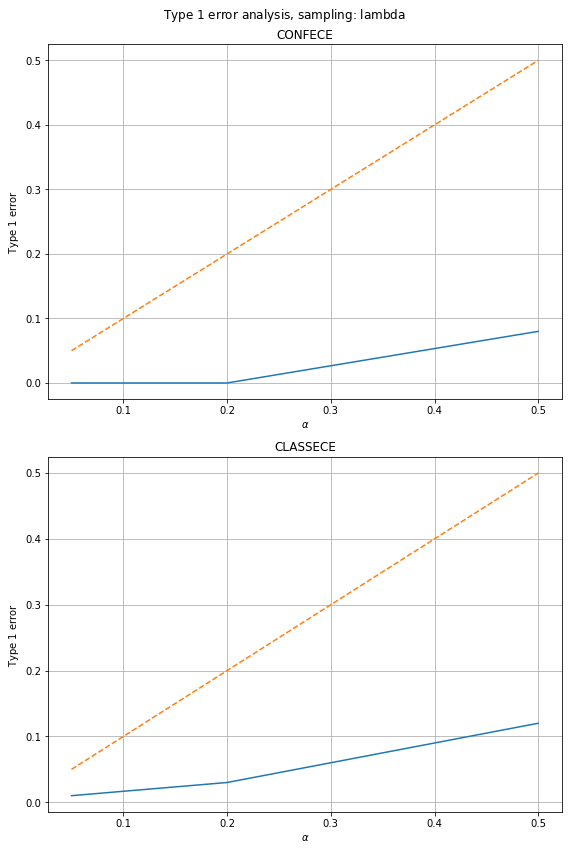

In [9]:
fig_lambda_1 = plot_t1_erros_analysis(results_lambda_1)

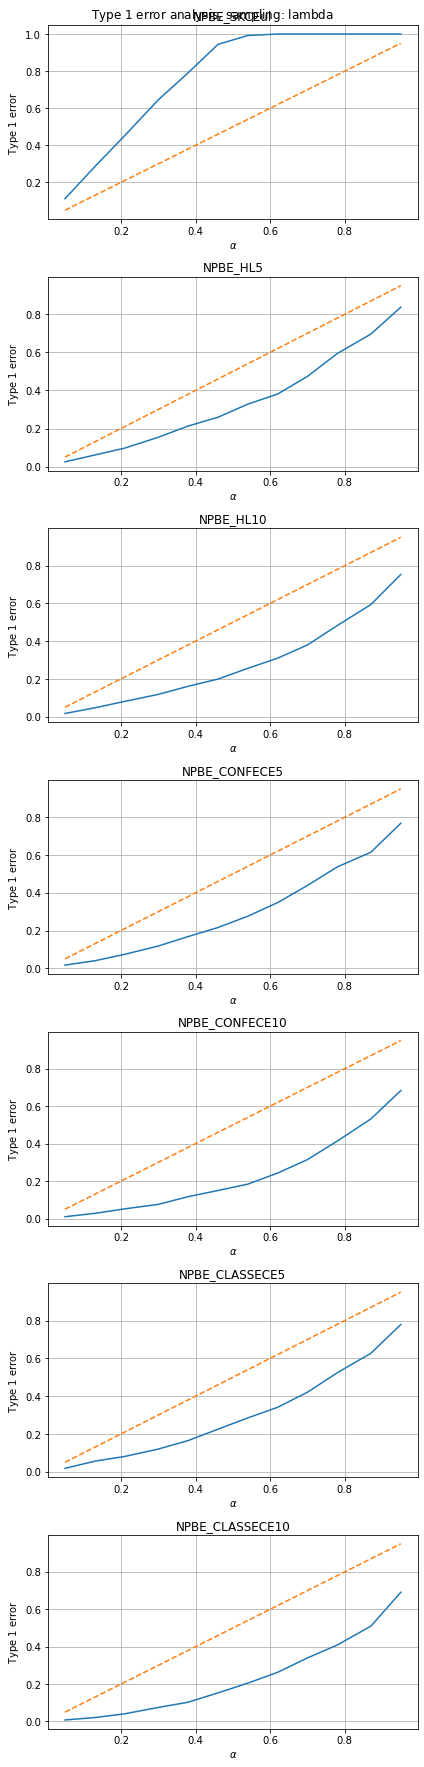

In [10]:
fig_lambda_final_3 = plot_t1_erros_analysis(results_final_3, list_errors=list(results_final_3.keys()), take_avg=False, figsize=(6, 25))

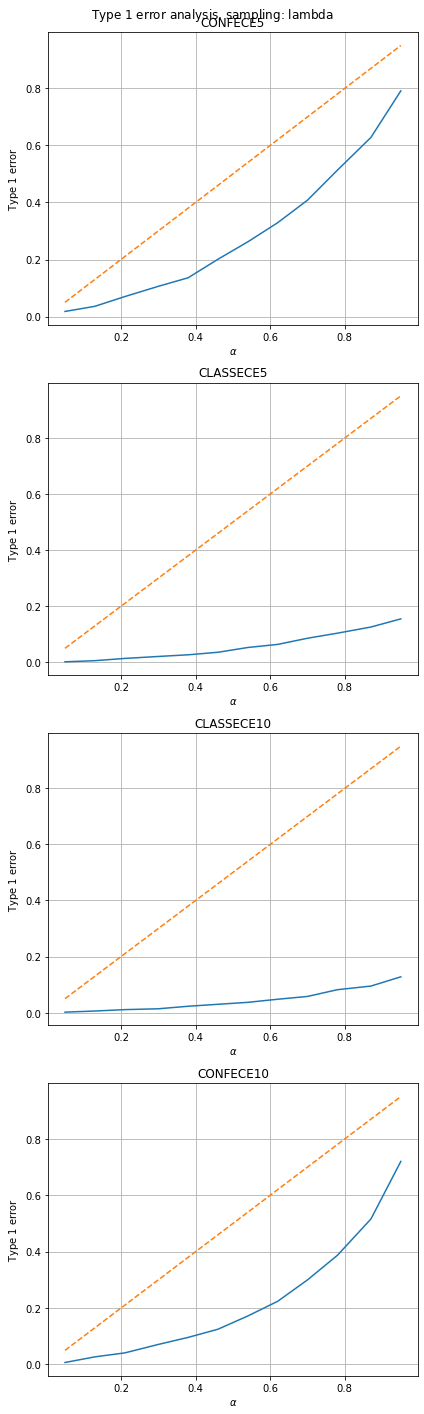

In [11]:
fig_mcmc_final = plot_t1_erros_analysis(results_final_mcmc, list_errors=list(results_final_mcmc.keys()), take_avg=False, figsize=(6, 20))

In [30]:
def plot_t1_erros_analysis_joint(df_1: pd.DataFrame, df_2: pd.DataFrame, list_errors: list = ['CONFECE', 'CLASSECE'], sampling_methods: list = ['original sampling', 'mcmc sampling'],
                            plot_ha: bool = False, figsize: tuple = (8, 12), title: Optional[str] = None):

    if 'alpha' in df_1:
        alphas = df_1['alpha'].values
    else:
        alphas = np.array([0.05, 0.13, 0.21, 0.30, 0.38, 0.46, 0.54, 0.62, 0.70, 0.78, 0.87, 0.95])
    
    results_1 = np.zeros((len(list_errors), len(alphas)))
    results_2 = np.zeros((len(list_errors), len(alphas) ))
    for i in range(len(list_errors)):
        results_i_1 = df_1[list_errors[i]]
        results_i_2 = df_2[list_errors[i]]

        for j in range(len(alphas)):
            val_ij_1 = literal_eval(results_i_1[0])[j]
            val_ij_2 = literal_eval(results_i_2[0])[j]
            results_1[i, j] = val_ij_1
            results_2[i, j] = val_ij_2
    
    if not plot_ha:
        fig, ax = plt.subplots(len(list_errors), 1, figsize=figsize)
        for j in range(len(list_errors)):
            ax[j].plot(alphas, results_1[j], label=sampling_methods[0])
            ax[j].plot(alphas, results_2[j], label=sampling_methods[1])
            ax[j].plot(alphas, alphas, '--', color='black')
            ax[j].set_title(f'{list_errors[j]}')
            ax[j].set_xlabel(r'$\alpha$')
            ax[j].set_ylabel(r'Type $1$ error')
            ax[j].grid()
        
        if title is not None:
            plt.suptitle(title)
        else:
            plt.suptitle(r'Type $1$ error analysis')
        plt.tight_layout()
        plt.legend()

    else:
        raise NotImplementedError

    return fig

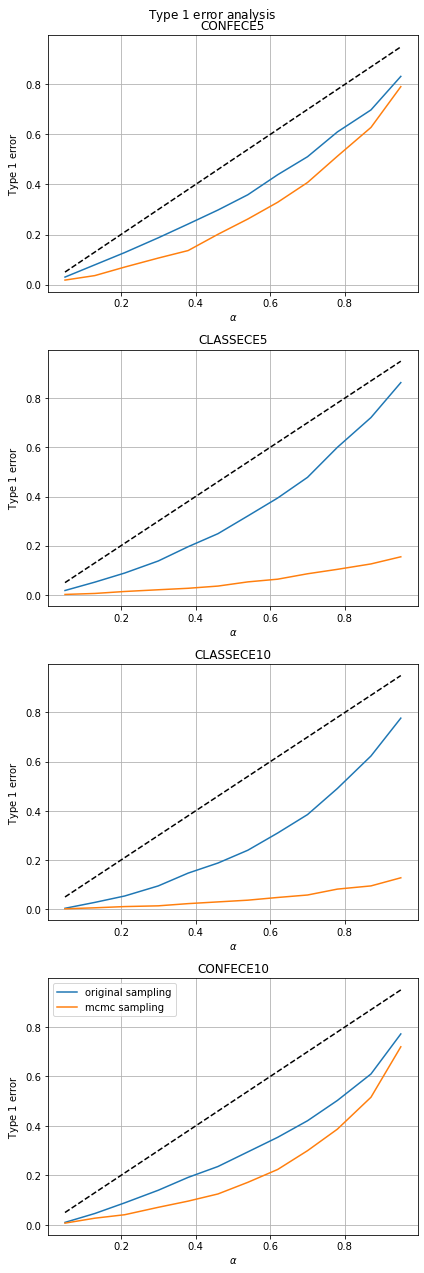

In [31]:
fig_comparison = plot_t1_erros_analysis_joint(results_final, results_final_mcmc, list_errors=list(results_final_mcmc.keys()), figsize=(6, 18))

In [29]:
results_final

,HL5,HL10,SKCEul,CONFECE5,CLASSECE5,CLASSECE10,CONFECE10
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.113, 0.271, 0.422, 0.607, 0.744, 0.888, 0.9...","[0.03, 0.079, 0.128, 0.187, 0.242, 0.298, 0.35...","[0.018, 0.052, 0.089, 0.138, 0.196, 0.249, 0.3...","[0.004, 0.028, 0.054, 0.095, 0.147, 0.188, 0.2...","[0.01, 0.046, 0.089, 0.14, 0.192, 0.236, 0.295..."
